In [18]:
# import packages
import geopandas as gpd
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point
from se4g_helper import connect_right_now
import folium

In [10]:
table_name = 'se4g_pollution_main' 

conn = connect_right_now()
cursor = conn.cursor()

db_columns = 'value_numeric, samplingpoint_x, samplingpoint_y '

# Define the filter conditions
pollutant_filter = "'SO2'"
datetime_filter = "'2023-06-14 18:00:00+01:00'"

# Generate the SQL statement to select data from the source table
select_data_query = f"SELECT {db_columns} FROM {table_name} WHERE pollutant = {pollutant_filter} AND value_datetime_end = {datetime_filter};"

# Execute the SELECT command
cursor.execute(select_data_query)

columns = [desc[0] for desc in cursor.description]
print(columns)
# Fetch all the rows
rows = cursor.fetchall()

cursor.close()
conn.close()

df = pd.DataFrame(rows, columns=columns)

connected with  localhost  through psycopg2
['value_numeric', 'samplingpoint_x', 'samplingpoint_y']


In [6]:
print(df['samplingpoint_x'][0:15],'\n',
df['samplingpoint_y'][0:15])

0     1.539138
1     1.539138
2     1.539138
3     1.539138
4     1.539138
5     1.539138
6     1.539138
7     1.539138
8     1.539138
9     1.539138
10    1.539138
11    1.539138
12    1.539138
13    1.539138
14    1.539138
Name: samplingpoint_x, dtype: float64 
 0     42.509694
1     42.509694
2     42.509694
3     42.509694
4     42.509694
5     42.509694
6     42.509694
7     42.509694
8     42.509694
9     42.509694
10    42.509694
11    42.509694
12    42.509694
13    42.509694
14    42.509694
Name: samplingpoint_y, dtype: float64


<Axes: >

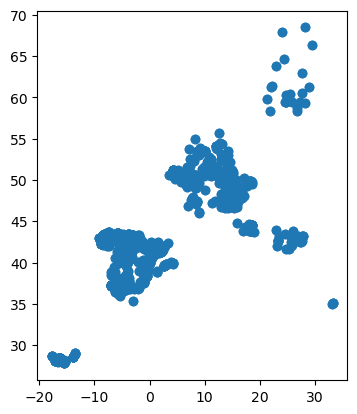

In [17]:
geom_list = [Point(xy) for xy in zip(df['samplingpoint_x'],df['samplingpoint_y'])]
crs = 'epsg:4979'
gdf = gpd.GeoDataFrame(df, crs=crs, geometry=geom_list)
gdf.plot() 

In [39]:
# create a simple Folium map with markers and popups
m = folium.Map(location=[57, 15], zoom_start=2.5, tiles='CartoDB positron')

# iterate through the GeoDataFrame and add a marker for each station by extracting its coordinates and the popup content
for index, row in gdf.iterrows():
    folium.Marker(
        location=[row['geometry'].y,row['geometry'].x], 
        popup=row['value_numeric'],
        icon=folium.map.Icon(color='red')
    ).add_to(m)
m

In [36]:
# use an heatmap to visualize the density of the stations

from folium import plugins

m = folium.Map(location = [55, 15], tiles='Cartodb dark_matter', zoom_start = 2.5)

heat_data = [[point.xy[1][0], point.xy[0][0]] for point in gdf.geometry]

heat_data

plugins.HeatMap(heat_data).add_to(m)

m